In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv(r"D:\download\World Cup 2023\matches.csv")
point_table = pd.read_csv(r"D:\download\World Cup 2023\points_table.csv")
deliveries = pd.read_csv(r"D:\download\World Cup 2023\deliveries.csv")

In [3]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           48 non-null     object 
 1   team1            48 non-null     object 
 2   team2            48 non-null     object 
 3   date             48 non-null     object 
 4   match_number     48 non-null     int64  
 5   venue            48 non-null     object 
 6   city             48 non-null     object 
 7   toss_winner      48 non-null     object 
 8   toss_decision    48 non-null     object 
 9   player_of_match  48 non-null     object 
 10  umpire1          48 non-null     object 
 11  umpire2          48 non-null     object 
 12  reserve_umpire   47 non-null     object 
 13  match_referee    48 non-null     object 
 14  winner           48 non-null     object 
 15  winner_runs      24 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_type       4

In [5]:
matches.tail()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
43,2023/24,England,Pakistan,2023/11/11,44,Eden Gardens,Kolkata,England,bat,DJ Willey,P Wilson,RJ Tucker,PR Reiffel,J Srinath,England,93.0,NaN,Group
44,2023/24,India,Netherlands,2023/11/12,45,M Chinnaswamy Stadium,Bengaluru,India,bat,SS Iyer,CB Gaffaney,MA Gough,CM Brown,RB Richardson,India,160.0,NaN,Group
45,2023/24,India,New Zealand,2023/11/15,46,Wankhede Stadium,Mumbai,India,bat,Mohammed Shami,RK Illingworth,RJ Tucker,AT Holdstock,AJ Pycroft,India,70.0,NaN,Semi Final
46,2023/24,South Africa,Australia,2023/11/16,47,Eden Gardens,Kolkata,South Africa,bat,TM Head,Nitin Menon,RA Kettleborough,MA Gough,J Srinath,Australia,NaN,3.0,Semi Final
47,2023/24,India,Australia,2023/11/19,48,Narendra Modi Stadium,Ahmedabad,Australia,field,TM Head,RK Illingworth,RA Kettleborough,CB Gaffaney,AJ Pycroft,Australia,NaN,6.0,Final


In [6]:
matches.isnull().sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     0
umpire1             0
umpire2             0
reserve_umpire      1
match_referee       0
winner              0
winner_runs        24
winner_wickets     24
match_type          0
dtype: int64

In [7]:
deliveries

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26114,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.1,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26115,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.2,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26116,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.3,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26117,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.4,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26119 entries, 0 to 26118
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                26119 non-null  int64  
 1   season                  26119 non-null  object 
 2   start_date              26119 non-null  object 
 3   venue                   26119 non-null  object 
 4   innings                 26119 non-null  int64  
 5   ball                    26119 non-null  float64
 6   batting_team            26119 non-null  object 
 7   bowling_team            26119 non-null  object 
 8   striker                 26119 non-null  object 
 9   non_striker             26119 non-null  object 
 10  bowler                  26119 non-null  object 
 11  runs_off_bat            26119 non-null  int64  
 12  extras                  26119 non-null  int64  
 13  wides                   665 non-null    float64
 14  noballs                 56 non-null   

# Run Analysis 

In [9]:
Total_Run = deliveries['runs_off_bat'].sum() + deliveries['extras'].sum()

In [10]:
deliveries['runs_off_bat'].sum() 

23427

In [11]:
deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).index

Index(['V Kohli', 'RG Sharma', 'Q de Kock', 'R Ravindra', 'DJ Mitchell',
       'DA Warner', 'SS Iyer', 'KL Rahul', 'HE van der Dussen', 'MR Marsh'],
      dtype='object', name='striker')

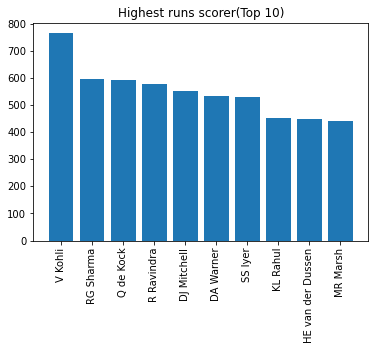

In [12]:
plt.bar(deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).index, deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).values)
plt.title('Highest runs scorer(Top 10)')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
deliveries['partnership'] = deliveries['striker'] + " & " + deliveries['non_striker']

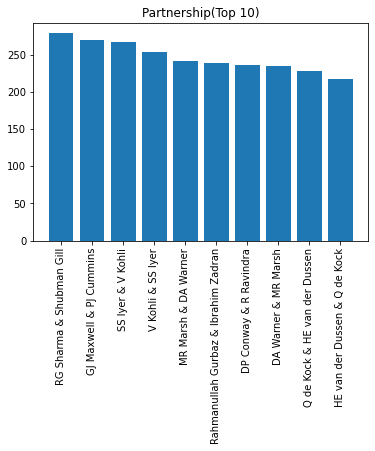

In [14]:
plt.bar(deliveries.groupby('partnership')['runs_off_bat'].sum().sort_values(ascending=False).head(10).index, deliveries.groupby('partnership')['runs_off_bat'].sum().sort_values(ascending=False).head(10).values)
plt.title('Partnership(Top 10)')
plt.xticks(rotation='vertical')
plt.show()

In [15]:
Partnership = deliveries.groupby(['partnership','match_id'])['runs_off_bat'].sum().sort_values(ascending=False)
grouped_data = Partnership.groupby(level=[0, 1]).mean()
grouped_data = grouped_data.reset_index()

In [16]:
partnership  = grouped_data.sort_values('runs_off_bat', ascending=False).head(10)

In [17]:
partnership

,partnership,match_id,runs_off_bat
397,GJ Maxwell & PJ Cummins,39,179
338,DP Conway & R Ravindra,1,142
1388,TM Head & M Labuschagne,48,127
354,Fakhar Zaman & Babar Azam,35,125
256,DA Warner & MR Marsh,18,124
1087,R Ravindra & DP Conway,1,123
850,MR Marsh & DA Warner,18,121
857,MR Marsh & SPD Smith,43,109
641,KL Rahul & SS Iyer,45,102
1122,RG Sharma & Ishan Kishan,9,102


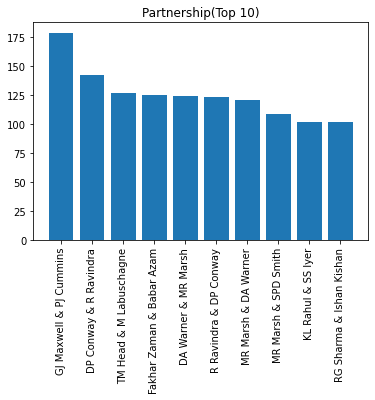

In [18]:
plt.bar(partnership['partnership'], partnership['runs_off_bat'].head(10))
plt.title('Partnership(Top 10)')
plt.xticks(rotation='vertical')
plt.show()

In [19]:
Total_run = deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)

In [20]:
Ball_faced = deliveries.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False)


In [21]:
Strike_rate = (Total_run/Ball_faced *100).sort_values(ascending=False)
Strike_rate.head(10)

striker
RJW Topley          177.777778
GJ Maxwell          147.601476
AAP Atkinson        142.307692
HH Pandya           137.500000
H Klaasen           129.965157
MA Wood             128.787879
Mujeeb Ur Rahman    127.500000
TM Head             126.053640
MJ Santner          125.609756
RG Sharma           123.092784
Name: runs_off_bat, dtype: float64

In [22]:
Balls_played = deliveries.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False)
Balls_played

striker
V Kohli               866
Q de Kock             569
R Ravindra            559
HE van der Dussen     540
M Labuschagne         519
                     ... 
Tanzim Hasan Sakib      6
JR Hazlewood            5
MADI Hemantha           4
Usama Mir               3
AT Carey                2
Name: runs_off_bat, Length: 146, dtype: int64

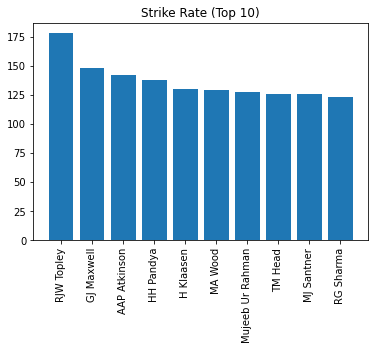

In [23]:
plt.bar(Strike_rate.head(10).index,Strike_rate.head(10).values )
plt.title('Strike Rate (Top 10)')
plt.xticks(rotation='vertical')
plt.show()


In [24]:
sixes = deliveries[deliveries['runs_off_bat'] == 6]

sixes.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10)

striker
RG Sharma       31
SS Iyer         24
DA Warner       24
DJ Mitchell     22
GJ Maxwell      22
MR Marsh        21
Q de Kock       21
DA Miller       20
H Klaasen       19
Fakhar Zaman    18
Name: runs_off_bat, dtype: int64

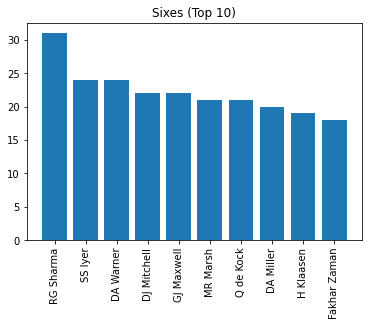

In [25]:
plt.bar(sixes.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).index, sixes.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).values)
plt.title('Sixes (Top 10)')
plt.xticks(rotation='vertical')
plt.show()

In [26]:
fours = deliveries[deliveries['runs_off_bat'] == 4]

fours.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10)

striker
V Kohli        68
RG Sharma      66
Q de Kock      57
R Ravindra     55
DP Conway      54
DJ Malan       50
DA Warner      50
DJ Mitchell    48
AK Markram     44
P Nissanka     44
Name: runs_off_bat, dtype: int64

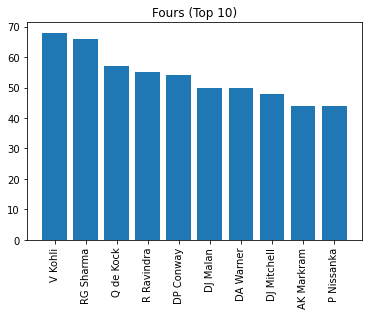

In [27]:
plt.bar(fours.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).index, 
        fours.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).values)
plt.title('Fours (Top 10)')
plt.xticks(rotation='vertical')
plt.show()

# Bowling Analysis


In [28]:
deliveries.groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10)

bowler
Mohammed Shami         25
A Zampa                23
D Madushanka           22
G Coetzee              20
JJ Bumrah              20
JR Hazlewood           19
MA Starc               18
Shaheen Shah Afridi    18
M Jansen               17
MJ Santner             16
Name: wicket_type, dtype: int64

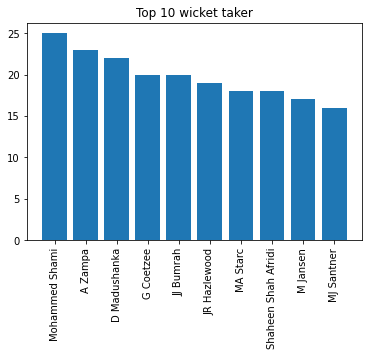

In [29]:
plt.bar(deliveries.groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10).index, 
        deliveries.groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10).values)
plt.title('Top 10 wicket taker')
plt.xticks(rotation='vertical')
plt.show()

In [30]:
Run_conceded = deliveries.groupby('bowler')['runs_off_bat'].sum().sort_values(ascending=False)

In [31]:
total_balls = deliveries.groupby('bowler')['runs_off_bat'].count().sort_values(ascending=False)

In [32]:
economy_rates = (Run_conceded/total_balls *6).sort_values(ascending=True)
economy_rates.head(10)

bowler
R Ashwin         3.400000
JJ Bumrah        3.633508
KA Maharaj       3.963100
Mohammad Nabi    4.048387
Noor Ahmad       4.100000
RA Jadeja        4.173451
Rashid Khan      4.203390
V Kohli          4.285714
Kuldeep Yadav    4.382609
AK Markram       4.407080
Name: runs_off_bat, dtype: float64

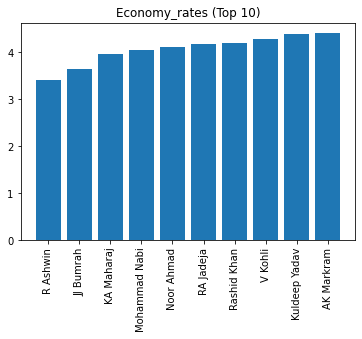

In [33]:
plt.bar(economy_rates.head(10).index,economy_rates.head(10).values )
plt.title('Economy_rates (Top 10)')
plt.xticks(rotation='vertical')
plt.show()

In [34]:
def get_over(ball):
    return str(ball).split('.')[0]
deliveries['over'] = deliveries['ball'].apply(lambda x: get_over(x))

In [35]:
deliveries.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,partnership,over
26114,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.1,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA van Meekeren & AT Nidamanuru,47
26115,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.2,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA van Meekeren & AT Nidamanuru,47
26116,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.3,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT Nidamanuru & PA van Meekeren,47
26117,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.4,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AT Nidamanuru & PA van Meekeren,47
26118,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.5,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,NaN,NaN,NaN,NaN,caught,AT Nidamanuru,NaN,NaN,AT Nidamanuru & PA van Meekeren,47


In [36]:
Extra = pd.DataFrame({'Extra_type':['wides', 'noballs', 'byes', 'legbyes', 'penalty'], 'Total_extra_run':[deliveries.wides.sum(),deliveries.noballs.sum(),deliveries.byes.sum(),deliveries.legbyes.sum(),deliveries.penalty.sum()]})
Extra

,Extra_type,Total_extra_run
0,wides,810.0
1,noballs,56.0
2,byes,89.0
3,legbyes,252.0
4,penalty,5.0


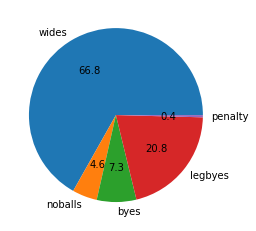

In [37]:
plt.pie(Extra["Total_extra_run"], labels = Extra["Extra_type"], autopct='%0.1f')
plt.show()